In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation # do the animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML  # display the animation in notebook
import sys

# <b>Game of Life</b>

<p style='text-align: justify;'>Game of Life (GoF)[2] is a cellular automaton devised by the British mathematician John Horton Conway in 1970. The game is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves, or, for advanced players, by creating patterns with particular properties.
The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead. Every cell interacts with its eight neighbours, which are the cells that are directly horizontally, vertically, or diagonally adjacent.</p>

In [2]:
# values for cell on or off in the grid
alive = 1 # values for cell alive
dead = 0 # value for cell dead
vals = [alive, dead]

## 1. Basic functions for Game of Life implementation

### 1.1 Grid generation

In [3]:
# I will use a predefined number, then it could be chosen by the user as input.
# Grid = matrix NxN in a two dimensional space
# the random pattern is the default one if not explicitly declared, the same for the size

random = np.random.choice(vals, (50-1)*(50-1), p=[0.2, 0.8]).reshape(50-1, 50-1)

def create_grid(N=50, pattern=random, localisation = 'top left'):
    grid = np.zeros((N, N))
    # we add the pattern to the grid (declaration above)
    grid = add_pattern_to_grid(grid, pattern, localisation)
        
    return grid

### 1.2 Update grid function

At each step in time, the following transitions occur:

* Any live cell with fewer than two live neighbours dies, as if by needs caused by underpopulation.
* Any live cell with more than three live neighbours dies, as if by overcrowding.
* Any live cell with two or three live neighbours lives, unchanged, to the next generation.
* Any dead cell with exactly three live neighbours becomes a live cell.

<img src="images/GameOfLifeDiagram.png" width="200" height="200" align="center"/>

In [4]:
def update_gridImage(frameNum, img, grid):
    
    N=np.size(grid,axis=0)
       
    grid_tmp = grid.copy() # not to mess up with the original one
    for i in range(N):
        for j in range(N):
            # get the total number of neighbors of the cell
            neighbors = grid[(i+1)%N,j] + grid[i,(j+1)%N] + grid[(i-1)%N,j] + grid[i,(j-1)%N] + grid[(i+1)%N,(j+1)%N] + grid[(i-1)%N,(j-1)%N] + grid[(i+1)%N,(j-1)%N] + grid[(i-1)%N,(j+1)%N]
 
            # check if it is still alive or not
            if grid[i, j] == alive:
                if (neighbors < 2) or (neighbors > 3):
                    grid_tmp[i, j] = dead
            else:
                if neighbors == 3:  # a dead cell with 3 neighbors can reborn
                    grid_tmp[i, j] = alive
 
    grid[:] = grid_tmp[:] # change the old grid
    img.set_data(grid_tmp) # update the image
    
    
    
    return img, grid


# useful for analysis
def update_grid(grid):
    
    N=np.size(grid,axis=0)
       
    grid_tmp = grid.copy() # not to mess up with the original one
    for i in range(N):
        for j in range(N):
            # get the total number of neighbors of the cell
            neighbors = grid[(i+1)%N,j] + grid[i,(j+1)%N] + grid[(i-1)%N,j] + grid[i,(j-1)%N] + grid[(i+1)%N,(j+1)%N] + grid[(i-1)%N,(j-1)%N] + grid[(i+1)%N,(j-1)%N] + grid[(i-1)%N,(j+1)%N]
 
            # check if it is still alive or not
            if grid[i, j] == alive:
                if (neighbors < 2) or (neighbors > 3):
                    grid_tmp[i, j] = dead
            else:
                if neighbors == 3:  # a dead cell with 3 neighbors can reborn
                    grid_tmp[i, j] = alive
 
    grid[:] = grid_tmp[:] # change the old grid
    
    
    return grid

### 1.3 Function for adding the pattern to the grid

<p style='text-align: justify;'>The initial pattern constitutes the 'seed' of the system. The first generation is created by applying the above rules simultaneously to every cell in the seed – births and deaths happen simultaneously, and the discrete moment at which this happens is sometimes called a tick. (In other words, each generation is a pure function of the one before.) The rules continue to be applied repeatedly to create further generations.</p>

In [5]:
# grid : the grid where we want to put the pattern
# pattern : the pattern of alive and death cells we want at the begining
# localisation : the loclisation of the top left celle of the pattern in the grid

# output: the grid with the pattern

def add_pattern_to_grid(grid, pattern, localisation = 'middle'):
    # dimension of the pattern
    c = np.size(pattern,axis=0)
    l = np.size(pattern,axis=1)
    
    if (localisation == 'top left') :
        grid[1:1+c, 1:1+l] = pattern # add the pattern in the top left corner
    else :
        N = np.size(grid,axis=0) # number of columns (= number of lines)
        grid[N//2:N//2+c, N//2:N//2+l] = pattern # add the pattern in the middle

    ####### ADD OTHER GRID LOCATIONS ########
        
    return grid

### 1.4 Grid animation 
This function provides the code for visualize the animation in jupyter notebook

In [6]:
def show_GoF(grid,frames=200,interval=200):
    # show the grid 
    N=grid.shape[0]
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest', cmap='Greys') 
    animation_grid = FuncAnimation(fig, update_gridImage, fargs=(img, grid, ), frames=200, interval=200, save_count=50) # animation  # init_func=create_grid
    plt.close()
    
    return animation_grid


## 2. GoF Patterns
In the years, a lot of initial seeds, or Patter, were developed. They are calssified according to their behaviour. There are three main categories as listed below:
* Still lifes
* Oscillators
* Spaceships

Other complex patterns were discovered and there are a variety[3]: for example patterns which evolve for long period before stabilizing (called <b>Mehuselahs</b>) or smaller patterns which exhibit infinite growth.

#### <b>Pattern features</b>

Patterns have some distinctive characteristics:
* <b>Occupancy</b>: how many cells are alive in each generation;
* <b>Boundig box</b>: the smallest square grid box that can contains the pattern;
* <b>Period</b>: it is the smallest number of generations that the pattern needs in order to return to its initial state.
* <b>Frequency class</b>: it is a measure of its commonness. The frequency class of an object O, in a given set of objects, is defined as x if the most common object in the set, M, is 2x times as common as O; <img src="FrequencyClass.png" width="200" height="0" align="center"/>
* <b>Mod</b>: it is a characteristic of an oscillator or spaceship. It is the smallest number of generations that it takes for it to reappear in its original form, it is may equal to its period;
* <b>Heat</b>: it is a characteristic of an oscillator or spaceship. It is the average number of celss that change state in each generation. The Temperature can be used as metric of heat in proportion to the total number of active cells;
* <b>Volatility</b>: it is a oscillator characteristic. It is the proportion of cells involved in the oscillator which actually oscillate.

Only for the spaceships there are two additional parameters:
* <b>Direction</b>: the way the pattern reappears in a different area;
* <b>Speed</b>: it is expressed in terms of <i>c</i> (metaphorical speed of light), it is a measure of the number of generations that it takes for some effect to travel some given distance. For spaceships it described the number of cells that it has been displaced by after it has gone through one period. It can be seend and displacements divided by the period.

### 2.1 Still lifes pattern

Still lifes are patterns which stay the same in function of the time. They don't change to one generation to the other. They can be thought as oscillators with period equal to 1. <b>Pseudo still life</b> can be built using two or more adjacent islands (non-interacting subparts) which are also still lifes.

2.1.1 <b>Block</b> </br>
It is the simplier and most common still lifes pattern. It is a 2x2 block and its peculiarity it is that can destroy other patterns without being destroyed itself. For this behaviour it is also called <i>Eater</i>.
* <b>Occupancy</b>: 4
* <b>Boundig box</b>: 2x2
* <b>Period</b>: 1
* <b>Frequency class</b>: 0.0

<img src="images/block.png" width="100" height="100" align="center"/>

In [7]:
# block
block = np.array([[alive, alive], 
                  [alive, alive]])

2.1.2 <b>Beehive</b> </br>
It is the second most common still lifes pattern.
* <b>Occupancy</b>: 6
* <b>Boundig box</b>: 4x3
* <b>Period</b>: 1
* <b>Frequency class</b>: 0.9

<img src="images/beehave.png" width="100" height="100" align="center"/>

In [8]:
#beehive
beehive = np.array([ [ 0, alive, alive, 0],
                    [alive, 0, 0, alive], 
                    [ 0, alive, alive, 0,]])

2.1.3 <b>Loaf</b> </br>
* <b>Occupancy</b>: 7
* <b>Boundig box</b>: 4x4
* <b>Period</b>: 1
* <b>Frequency class</b>: 2.7

<img src="images/loaf.png" width="100" height="100" align="center"/>

In [9]:
# loaf
loaf = np.array([[0, alive, alive, 0],
                 [alive, 0, 0, alive],
                 [0, alive, 0, alive],
                 [0, 0, alive, 0]])

2.1.4 <b>Boat</b> </br>
* <b>Occupancy</b>: 5
* <b>Boundig box</b>: 3x3
* <b>Period</b>: 1
* <b>Frequency class</b>: 2.8


<img src="images/boat.png" width="100" height="100" align="center"/>

In [10]:
# boat
boat = np.array([[alive, alive, 0],
                 [alive, 0, alive],
                 [0, alive, 0]])

2.1.5 <b>Tub</b> </br>
* <b>Occupancy</b>: 4
* <b>Boundig box</b>: 3x3
* <b>Period</b>: 1
* <b>Frequency class</b>: 5.0


<img src="images/tub.png" width="100" height="100" align="center"/>

In [11]:
# tub
tub = np.array([[0, alive, 0],
                [alive, 0, alive],
                [0, alive, 0]])

2.1.6 <b>The biggest still life pattern</b> </br> 
<!--
* <b>Occupancy</b>: 4
* <b>Boundig box</b>: 3x3
* <b>Period</b>: 1

 <img src="tub.png" width="100" height="100" align="center"/> -->

In [12]:
biggest_still_life =  np.array([[0,1,0,0,0,1,0,0,0,1,0],
                             [1,0,1,0,1,0,1,0,1,0,1],
                             [1,0,1,0,1,0,1,0,1,0,1],
                             [0,1,1,0,1,0,1,0,1,1,0],
                             [0,0,0,0,1,0,1,0,0,0,0],
                             [0,0,0,0,1,0,1,0,0,0,0],
                             [0,0,0,1,1,0,1,1,0,0,0],
                             [0,0,1,0,0,0,0,1,0,0,0],
                             [0,0,1,1,0,1,1,0,0,0,0],
                             [0,0,0,0,1,0,1,0,0,0,0],
                             [0,0,0,1,0,0,1,0,0,0,0],
                             [0,0,0,1,0,1,0,0,0,0,0],
                             [0,0,1,1,0,1,1,0,0,0,0]])

### 2.2 Oscillators patterns
Oscillators are patterns that returns in their initial state after some generations. It repeats itself indefinitely.

2.2.1 <b>Blinker</b> </br>
It is the smallest and most common oscillator.
* <b>Occupancy</b>: 3
* <b>Boundig box</b>: 3x3
* <b>Period</b>: 2
* <b>Frequency class</b>: 0.1
* <b>Mod</b>: 1
* <b>Heat</b>: 4
* <b>Volatility</b>: 0.80

<img src="images/blinker.gif" width="100" height="100" align="center"/>

In [13]:
# the more simple oscillator 
blinker = np.array([[0, 0, 0],
                    [alive, alive, alive],  
                    [0, 0, 0]])

2.2.2 <b>Toad</b> </br>
* <b>Occupancy</b>: 6
* <b>Boundig box</b>: 4x4
* <b>Period</b>: 2
* <b>Frequency class</b>: 7.1
* <b>Mod</b>: 2
* <b>Heat</b>: 8
* <b>Volatility</b>: 0.80

<img src="images/toad.gif" width="100" height="100" align="center"/>

In [14]:
# toad 
toad = np.array([[0, 0, 0, 0],
                 [0, alive, alive, alive],
                 [alive, alive, alive, 0],
                 [0, 0, 0, 0]])

2.2.3 <b>Beacon</b> </br>
* <b>Occupancy</b>: 6
* <b>Boundig box</b>: 4x4
* <b>Period</b>: 2
* <b>Frequency class</b>: 8.8
* <b>Mod</b>: 2
* <b>Heat</b>: 2
* <b>Volatility</b>: 0.25

<img src="images/beacon.gif" width="100" height="100" align="center"/>

In [15]:
# beacon
beacon = np.array([[alive, alive, 0, 0],
                   [alive, 0, 0, 0],
                   [0, 0, 0, alive],
                   [0, 0, alive, alive]])

2.2.4 <b>Pulsar</b> </br>
* <b>Occupancy</b>: 48
* <b>Boundig box</b>: 15x15
* <b>Period</b>: 3
* <b>Frequency class</b>: 12.1
* <b>Mod</b>: 3
* <b>Heat</b>: 42.7
* <b>Volatility</b>: 0.73

<img src="images/pulsar.gif" width="100" height="100" align="center"/>

In [16]:
# pulsar
pulsar = np.zeros((15, 15))
pulsar[1, 3:6] = alive
pulsar[3:6, 6] = alive
pulsar += pulsar.T
pulsar += pulsar[:, ::-1]
pulsar += pulsar[::-1, :]

2.2.5 <b>Pentadecathlon</b> </br>
* <b>Occupancy</b>: 12
* <b>Boundig box</b>: 16x9
* <b>Period</b>: 15
* <b>Frequency class</b>: 18.6
* <b>Mod</b>: 15
* <b>Heat</b>: 22.4
* <b>Volatility</b>: 1.00

<img src="images/pentadecathlon.gif" width="100" height="100" align="center"/>

In [17]:
pentadecathlon = np.zeros((16, 9))
pentadecathlon[2, 3:6] = alive
pentadecathlon[3:5, 4] = alive
pentadecathlon[5, 3:6] = alive
pentadecathlon[7, 3:6] = alive
pentadecathlon += pentadecathlon[::-1, :]

# or also this : pentadecathlon =  np.ones((1,10))

### 2.3 Spaceships patterns : 
These are finite patterns that return to its initial state after a number of generations (known as their period) but in a different location. They have another characteristic named <i>Direction</i>.

2.3.1 <b>Glider</b> </br>
It is the smallest, most common, and first-discovered spacechip. They are easily produced (see the <i>Gosper glider gun</i>).
* <b>Occupancy</b>: 5
* <b>Boundig box</b>: 3x3
* <b>Period</b>: 4
* <b>Direction</b>: Diagonal
* <b>Frequency class</b>: 1.8
* <b>Mod</b>: 2
* <b>Heat</b>: 4
* <b>Speed</b>: c/4

<img src="images/glider.gif" width="100" height="100" align="center"/>

In [18]:
glider = np.array([[0, 0, alive], 
                   [alive, 0, alive], 
                   [0, alive, alive]])

2.3.2 <b>Lightweight spaceship</b> </br>
* <b>Occupancy</b>: 9
* <b>Boundig box</b>: 5x4
* <b>Period</b>: 4
* <b>Direction</b>: Orthogonal
* <b>Frequency class</b>: 11.2
* <b>Mod</b>: 2
* <b>Heat</b>: 11
* <b>Speed</b>: c/2

<img src="images/small_spaceship.gif" width="100" height="100" align="center"/>

In [19]:
lightweight_spaceship = np.array([[0, alive, 0, 0, alive],
                                [alive, 0, 0, 0, 0],
                                [alive, 0, 0, 0, alive],
                                [alive, alive, alive, alive, 0]])

2.3.3 <b>Middleweight spaceship</b> </br>
* <b>Occupancy</b>: 11
* <b>Boundig box</b>: 6x4
* <b>Period</b>: 4
* <b>Direction</b>: Othogonal
* <b>Frequency class</b>: 13.2
* <b>Mod</b>: 2
* <b>Heat</b>: 15
* <b>Speed</b>: c/2

<img src="images/medium_spaceship.gif" width="100" height="100" align="center"/>

In [20]:
middleweight_spaceship = np.array([[0, 0, 0, alive, 0, 0],
                                  [0, alive, 0, 0, 0, alive],
                                  [alive, 0, 0, 0, 0, 0],
                                  [alive, 0, 0, 0, 0, alive],
                                  [alive, alive, alive, alive, alive, 0]])

2.3.4 <b>Heavyweight spaceship</b> </br>
* <b>Occupancy</b>: 13
* <b>Boundig box</b>: 7x4
* <b>Period</b>: 4
* <b>Direction</b>: Othogonal
* <b>Frequency class</b>: 15.7
* <b>Mod</b>: 2
* <b>Heat</b>: 19
* <b>Speed</b>: c/2

<img src="images/large_spaceship.gif" width="100" height="100" align="center"/>

In [21]:
heavyweight_spaceship = np.array([[0, 0, 0, alive, alive, 0, 0],
                                 [0, alive, 0, 0, 0, 0, alive],
                                 [alive, 0, 0, 0, 0, 0, 0],
                                 [alive, 0, 0, 0, 0, 0, alive],
                                 [alive, alive, alive, alive, alive, alive, 0]])

2.3.5 <b>3 Spaceships</b>

In [22]:
spaceships3 =  np.array([[0,0,0,0,1,1,0],
                         [1,1,1,1,0,1,1],
                         [1,1,1,1,1,1,0],
                         [0,1,1,1,1,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,1,1,0],
                         [0,1,1,1,0,1,1],
                         [0,1,1,1,1,1,0],
                         [0,0,1,1,1,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0],
                         [0,0,0,0,1,1,0],
                         [0,0,1,1,0,1,1],
                         [0,0,1,1,1,1,0],
                         [0,0,0,1,1,0,0]])

### 2.4 More complex patterns 

2.4.1 <b>The conway pattern</b> </br>
It is a simple pattern that become a constant complex pattern composed of 15 still life pattern, 4 oscillators and some spaceships patterns after 1103 iterations 

In [23]:
conway = np.array([[0, alive, alive], [alive, alive, 0], [0, alive, 0]])

2.4.2 <b>Gosper Glider gun</b> </br> 
It creates gliders
* <b>Occupancy</b>: 36
* <b>Boundig box</b>: 36x9
* <b>Period</b>: 30

<img src="images/gosper_glider_gun.gif" width="200" height="150" align="center"/>

In [24]:
glider_gun =  np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
    [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

2.4.3 <b>The Puffer Train</b> </br>
What happens is the 'train' starts moving and leaves a trail of mess behind, kind of like the smoke from a train. 

In [25]:
puffer = np.array([[0,1,1,1,1],
                   [1,0,0,0,1],
                   [0,0,0,0,1],
                   [1,0,0,1,0]])
temp = np.array([[0,1,0,0,0],
                 [0,0,1,0,0],
                 [0,0,1,0,0],
                 [0,1,1,0,0],
                 [1,0,0,0,0]])

puffer = np.concatenate([puffer, np.zeros((2,5)), temp, np.zeros((3,5)) , puffer[:4, :] ])


2.4.4 <b>Max</b> </br>
Max is a special pattern which was discovered by Tim Coe. It the smallest starting population of any spacefiller.

In [26]:
# https://www.conwaylife.com/wiki/Max

maxp = 18*'0' + '1'+ 8*'0'+ 17*'0'+'111'+7*'0'+ 12*'0'+'111'+4*'0' + '11'+6*'0'+\
      11*'0'+'100111001011'+14*'0'+'1'+3*'0'+'10100101'+5*'0' +\
      10*'0'+'1'+4*'0'+'1010101011'+14*'0'+'1'+4*'0'+'1010001100'+4*'1'+5*'0'+'101'+4*'0'+'1'+3*'0'+'1011100' +\
      '1'+3*'0'+'11010111011'+9*'0'+'1101'+5*'0'+'11'+5*'0'+'1'+14*'0'+'1001101001001011'+17*'0' +'10101010101'+\
      5*'0'+4*'1'+'010011010010010011010110001'

maxp = np.array([float(g) for g in maxp]).reshape(13,27)
maxb = np.flip(maxp)
inter = '1'+5*'0'+'110001010100011'+5*'0'+'1'
inter = np.array([float(g) for g in inter]).reshape(1,27)

maxCoe = np.concatenate([maxp,inter,maxb])

# 3. GoF implementation

## 3.1 Small dimension

#### 3.1.1 Random pattern

In [27]:
# show the GoF grid animation
N = 50
grid = create_grid(N)
animation = show_GoF(create_grid())
# in anaconda prompt you have to do : conda install -c conda-forge ffmpeg 
HTML(animation.to_html5_video()) # must use it in notebook in order to visualize the animation

#### 3.1.2 Try and test the most common patterns
In this section we can use the patterns definded before in order to visualize them in the animation. </br>
The name of the pattern defined will be put in the method <i>create_grid</i>.

In [28]:
# here we can generate the grid with dimension and pattern parameters
# show the grid and the animation
N = 20
grid = create_grid(N, glider, 'middle') # CHANGE THE PATTERN HERE
#print(grid)

animation = show_GoF(grid)
HTML(animation.to_html5_video())

## 3.2 High dimension with complex pattern

#### 3.2.1 Conway pattern

In [29]:
N=100
grid = create_grid(N, conway, 'middle')
animation = show_GoF(grid)
HTML(animation.to_html5_video())

#### 3.2.2 Glider Cannon

In [30]:
N=100
grid = create_grid(N, glider_gun)
animation = show_GoF(grid)
HTML(animation.to_html5_video())

#### 3.2.3 Max ( space filler)

In [31]:
N = 250
grid = create_grid(N, maxCoe, 'middle')
animation = show_GoF(grid,100,100 )
HTML(animation.to_html5_video())

#### 3.2.4 Puffer

In [32]:
N = 150
grid = create_grid(N, puffer, 'top left')
animation = show_GoF(grid)
HTML(animation.to_html5_video())

# 4. Frequency analysis

In [33]:
# returns the type of the pattern and its period
def freq_calculator(pattern):
    pattern_size = pattern.shape #get dimension of pattern

    grid = create_grid(pattern=pattern) #create the grid with the pattern
    N=grid.shape[0]
    u_grid = grid.copy()

    pattern_type = 'Nothing' #default pattern type and frequency
    frequency = 0
    
    for i in range(50):
        u_grid = update_grid(u_grid) #update of the grid

        for j in range(N):
            for k in range(N):
                # if it is a still lifes
                if (np.array_equal(u_grid,grid)) and (i == 0):
                    pattern_type = 'Still Lifes'
                    return pattern_type, frequency
                
                # if it is an oscillator
                if (i > 0) and (np.array_equal(u_grid,grid)):
                    pattern_type = 'Oscillator'
                    frequency = i+1
                    return pattern_type, frequency
                
                # if it is a spaceship
                if (i > 0) and (np.array_equal(u_grid[j:j+pattern_size[0],k:k+pattern_size[1]],pattern)) and (np.array_equal(u_grid,grid) == False) and (np.sum(u_grid) == np.sum(grid)):
                    pattern_type = 'Spaceship'
                    frequency = i+1
                    return pattern_type, frequency
                
                # if it is a pattern that ganerates spaceships
                if (i > 0) and (np.array_equal(u_grid[j:j+pattern_size[0],k:k+pattern_size[1]],pattern)) and (np.array_equal(u_grid,grid) == False):
                    pattern_type = 'Spaceship generator'
                    frequency = i+1
                    return pattern_type, frequency
    
    return pattern_type, frequency

In [34]:
print(" Block : ", freq_calculator(block))
print(" Blinker : ",freq_calculator(blinker))
print(" Glider : ",freq_calculator(glider))
print(" Penta decathlon : ",freq_calculator(pentadecathlon))
print(" Glider Cannon : ",freq_calculator(glider_gun))
print(" Puffer : ",freq_calculator(puffer))
print(" Max : ",freq_calculator(maxCoe)) # the pattern type is "spacefiller" it fills the space

 Block :  ('Still Lifes', 0)
 Blinker :  ('Oscillator', 2)
 Glider :  ('Spaceship', 4)
 Penta decathlon :  ('Oscillator', 15)
 Glider Cannon :  ('Spaceship generator', 30)
 Puffer :  ('Spaceship generator', 20)
 Max :  ('Nothing', 0)


# 5. Occupancy analysis

In [35]:
# returns an array of occupancy for each iteration

def occupancy_array(pattern,iteration=200,N=50, localisation = 'top left'):
    pattern_size = pattern.shape #get dimension of pattern

    grid = create_grid(N,pattern, localisation) #create the grid with the pattern
    u_grid = grid.copy()
    
    occupancy= np.ones((iteration+1))    
    occupancy[0]= np.sum(u_grid)
    for i in range(iteration):
        u_grid = update_grid(u_grid) #update of the grid
        occupancy[i+1]= np.sum(u_grid)

    return occupancy

### 5.1 Still lifes pattern

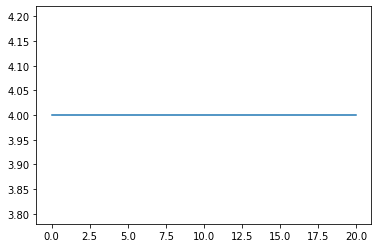

In [36]:
occ = occupancy_array(block, 20, 20)  
plt.plot(occ)

### 5.2 Spaceship and Oscillator pattern

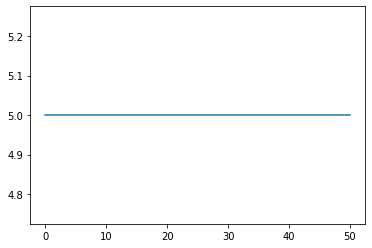

In [37]:
occ = occupancy_array(glider, 50, 50)  
plt.plot(occ)

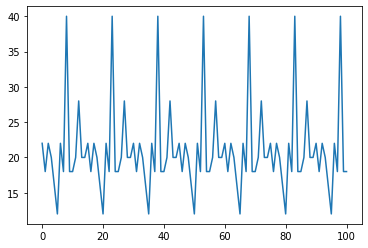

In [38]:
occ = occupancy_array(pentadecathlon, 100, 50)  
plt.plot(occ)

### 5.3 Spaceship generator and Space filler

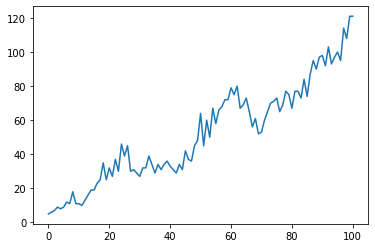

In [39]:
occ = occupancy_array(conway, 100, 100, 'middle')  
plt.plot(occ)

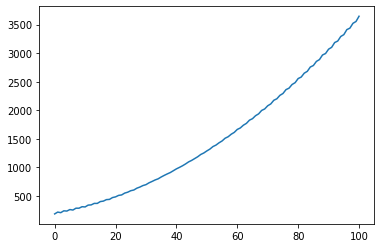

In [40]:
occ = occupancy_array(maxCoe, 100, 200, 'middle')  
plt.plot(occ)

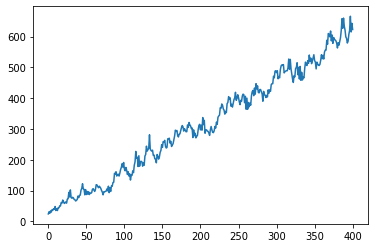

In [41]:
occ = occupancy_array(puffer, 400, 200, 'middle')  
plt.plot(occ)

## Still lifes pattern analysis

## Oscillators pattern analysis

## Spaceships pattern analysis

# 6. Final Discussion


# 7. References
[1] https://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/ </br>
[2] https://en.wikipedia.org/wiki/Conway's_Game_of_Life </br>
[3] https://www.conwaylife.com/wiki/Main_Page </br>